In [2]:
from glob import glob

import numpy as np
import pandas as pd
import patsy
import re

import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt

% matplotlib inline

NAN = float('nan')
INPUT_PATH = "../data/2/{}_{}.csv"

In [3]:
seasons = "2014-2017"
RB_df = pd.read_csv(INPUT_PATH.format("RB", seasons))
WR_df = pd.read_csv(INPUT_PATH.format("WR", seasons))

* **–1**. A **perfect negative** linear relationship
* **–0.70**. A **strong negative** linear relationship
* **–0.50**. A **moderate negative** relationship
* **–0.30**. A **weak negative** linear relationship
* **0. No linear relationship**
* **+0.30**. A **weak positive** linear relationship
* **+0.50**. A **moderate positive** relationship
* **+0.70**. A **strong positive** linear relationship
* **+1**. A **perfect positive** linear relationship


# Rushing Stats

In [4]:
def show_corr(df):
    formula = 'next_fp ~ rush_td + rush_att + rush_yd'
    fig, ax = plt.subplots(figsize=(10,5), ncols=1, nrows=1)
    df = df.loc[:,('next_fp', 'fp', 'rush_td', 'rush_att', 'rush_yd')]
    sns.pairplot(df, size=1.2, aspect=1.5)

    sns.heatmap(df.corr(), cmap="seismic", annot=True, ax=ax)
    
    y, X = patsy.dmatrices(formula, data=RB_df, return_type="dataframe")
    model = sm.OLS(y, X)
    fit = model.fit()
    return fit.summary()

## RB

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                next_fp   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     103.2
Date:                Fri, 20 Jul 2018   Prob (F-statistic):           9.76e-64
Time:                        20:06:56   Log-Likelihood:                -10435.
No. Observations:                3193   AIC:                         2.088e+04
Df Residuals:                    3189   BIC:                         2.090e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0956      0.221     32.138      0.000       6.663       7.528
rush_td        0.5480      0.192      2.857      0.004       0.172       0.924
rush_att       0.2227      0.027      8.331      0.000       0.170       0.275
rush_yd        0.0084      0.005      1.628      0.104      -0.002       0.019
==============================================================================
Omnibus:                      669.043   Durbin-Watson:                   1.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1316.287
Skew:                           1.253   Prob(JB):                    1.49e-286
Kurtosis:                       4.900   Cond. No.                         129.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

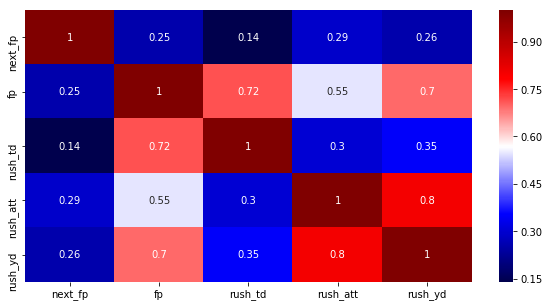

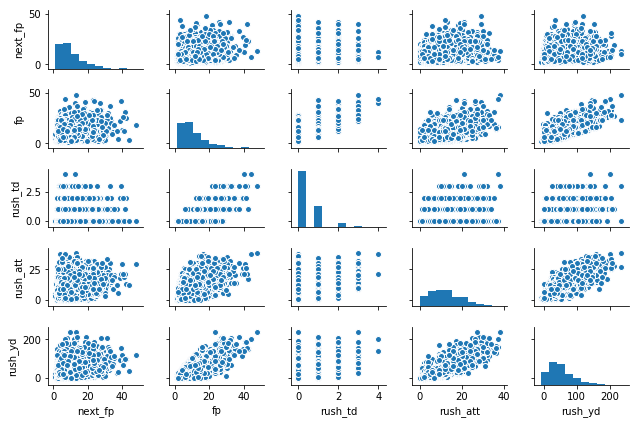

In [5]:
show_corr(RB_df)

## WR

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                next_fp   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     103.2
Date:                Fri, 20 Jul 2018   Prob (F-statistic):           9.76e-64
Time:                        20:07:24   Log-Likelihood:                -10435.
No. Observations:                3193   AIC:                         2.088e+04
Df Residuals:                    3189   BIC:                         2.090e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0956      0.221     32.138      0.000       6.663       7.528
rush_td        0.5480      0.192      2.857      0.004       0.172       0.924
rush_att       0.2227      0.027      8.331      0.000       0.170       0.275
rush_yd        0.0084      0.005      1.628      0.104      -0.002       0.019
==============================================================================
Omnibus:                      669.043   Durbin-Watson:                   1.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1316.287
Skew:                           1.253   Prob(JB):                    1.49e-286
Kurtosis:                       4.900   Cond. No.                         129.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

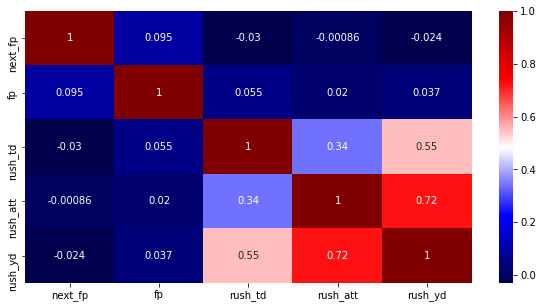

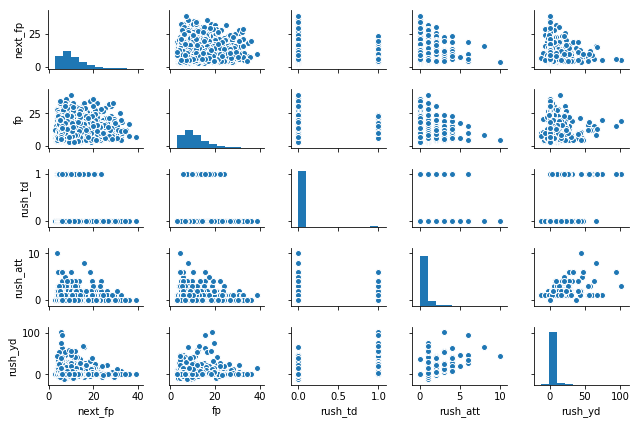

In [6]:
show_corr(WR_df)

## Combined

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                next_fp   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     103.2
Date:                Fri, 20 Jul 2018   Prob (F-statistic):           9.76e-64
Time:                        20:07:40   Log-Likelihood:                -10435.
No. Observations:                3193   AIC:                         2.088e+04
Df Residuals:                    3189   BIC:                         2.090e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0956      0.221     32.138      0.000       6.663       7.528
rush_td        0.5480      0.192      2.857      0.004       0.172       0.924
rush_att       0.2227      0.027      8.331      0.000       0.170       0.275
rush_yd        0.0084      0.005      1.628      0.104      -0.002       0.019
==============================================================================
Omnibus:                      669.043   Durbin-Watson:                   1.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1316.287
Skew:                           1.253   Prob(JB):                    1.49e-286
Kurtosis:                       4.900   Cond. No.                         129.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

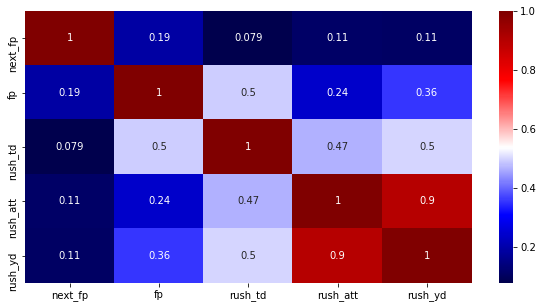

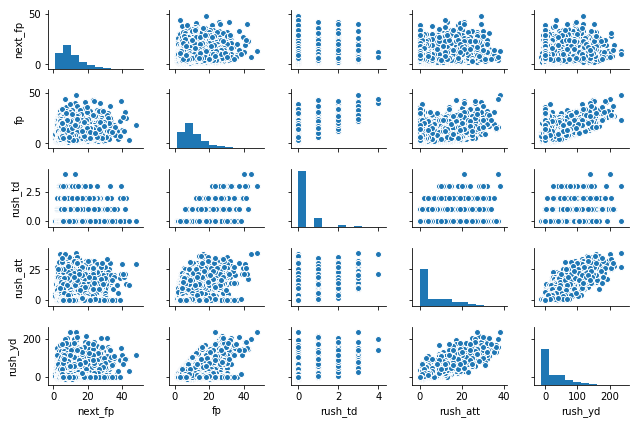

In [7]:
combined = RB_df[['next_fp', 'fp', 'rush_yd', 'rush_att', 'rush_td']].append(
    WR_df[['next_fp', 'fp', 'rush_yd', 'rush_att', 'rush_td']])
show_corr(combined)

* Rush attempts and Rush yds probably collinear.
* Rush attempts seem to be important for running backs, but nonexistent for WR. 